In [1]:
!pip install yfinance ta --quiet

  Preparing metadata (setup.py) ... done


In [2]:

import pandas as pd
import numpy as np
import os
import warnings
import joblib
warnings.filterwarnings("ignore")

import yfinance as yf


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
bhavcopy_path = '/content/nse bhavcopy (1).csv'

df_bhav = pd.read_csv(bhavcopy_path)

df_bhav.head()

,SYMBOL,NAME OF COMPANY,SERIES,DATE OF LISTING,PAID UP VALUE,MARKET LOT,ISIN NUMBER,FACE VALUE
0,20MICRONS,20 Microns Limited,EQ,06-OCT-2008,5,1,INE144J01027,5
1,21STCENMGM,21st Century Management Services Limited,BE,03-MAY-1995,10,1,INE253B01015,10
2,360ONE,360 ONE WAM LIMITED,EQ,19-SEP-2019,1,1,INE466L01038,1
3,3IINFOLTD,3i Infotech Limited,EQ,22-OCT-2021,10,1,INE748C01038,10
4,3MINDIA,3M India Limited,EQ,13-AUG-2004,10,1,INE470A01017,10


In [5]:
df_bhav.columns = df_bhav.columns.str.strip()

df_eq = df_bhav[df_bhav['SERIES'] == 'EQ']

symbols = df_eq['SYMBOL'].unique().tolist()
symbols = [symbol + ".NS" for symbol in symbols]

print("Total EQ stocks found:", len(symbols))
print("Example tickers:", symbols[:5])

Total EQ stocks found: 1797
Example tickers: ['20MICRONS.NS', '360ONE.NS', '3IINFOLTD.NS', '3MINDIA.NS', '5PAISA.NS']


In [7]:
import os
import time
import logging
from concurrent.futures import ThreadPoolExecutor, as_completed
import yfinance as yf

# Silence yfinance noise
logging.getLogger("yfinance").setLevel(logging.CRITICAL)

# Output folder in Drive
output_dir = "/content/drive/MyDrive/NSE_Stock_Data"
os.makedirs(output_dir, exist_ok=True)

START_DATE = "2010-01-01"
END_DATE = "2025-01-01"

def download_stock(symbol: str) -> str:
    try:
        filename = f"{symbol.replace('.NS', '')}_2010_2025.csv"
        filepath = os.path.join(output_dir, filename)

        if os.path.exists(filepath):
            return f"Already exists: {symbol}"

        # Single-ticker download
        data = yf.download(
            symbol,
            start=START_DATE,
            end=END_DATE,
            progress=False,
            auto_adjust=False,
            threads=False,   # important: don't double-thread
            interval="1d"
        )

        if data is None or data.empty:
            return f"No data: {symbol}"

        data.reset_index(inplace=True)
        data.to_csv(filepath, index=False)
        return f"Downloaded: {symbol} ({len(data)} rows)"

    except Exception as e:
        return f"Failed {symbol}: {e}"

# Try with fewer threads first
max_threads = 3   # start low, you can increase to 5 later

print("Starting multithreaded download...")

success = no_data = failed = 0

with ThreadPoolExecutor(max_workers=max_threads) as executor:
    futures = {executor.submit(download_stock, symbol): symbol for symbol in symbols}

    from tqdm.auto import tqdm
    for future in tqdm(as_completed(futures), total=len(futures), desc="Downloading"):
        result = future.result()
        print(result)

        if result.startswith("Downloaded"):
            success += 1
        elif result.startswith("No data"):
            no_data += 1
        elif result.startswith("Failed"):
            failed += 1

        # Be gentle with Yahoo: pause a bit
        time.sleep(0.2)

print("\nSummary:")
print("Downloaded:", success)
print("No data:", no_data)
print("Failed:", failed)
print("Total tried:", len(symbols))


Starting multithreaded download...


Downloading:   0%|          | 0/1797 [00:00<?, ?it/s]

Already exists: ARCHIES.NS
Already exists: ARKADE.NS
Already exists: AKG.NS
Already exists: ADVANIHOTR.NS
Already exists: ASALCBR.NS
Already exists: APOLLOPIPE.NS
Downloaded: AFCONS.NS (3700 rows)
Already exists: ALOKINDS.NS
Already exists: ASAL.NS
Already exists: APTUS.NS
Already exists: ADROITINFO.NS
Already exists: AMBICAAGAR.NS
Already exists: AHLADA.NS
Already exists: AARTISURF.NS
Already exists: ADANIGREEN.NS
Already exists: ARVIND.NS
Already exists: AJAXENGG.NS
Already exists: ACCURACY.NS
Already exists: ARE&M.NS
Already exists: ANGELONE.NS
Already exists: ADANIENT.NS
Already exists: AIROLAM.NS
Already exists: AARON.NS
Already exists: AFFORDABLE.NS
Already exists: ACCELYA.NS
Already exists: AMNPLST.NS
Already exists: ABREL.NS
Already exists: APARINDS.NS
Already exists: AIIL.NS
Already exists: ARVSMART.NS
Already exists: AKASH.NS
Already exists: ANANTRAJ.NS
Already exists: 5PAISA.NS
Already exists: ARIHANTCAP.NS
Already exists: ALEMBICLTD.NS
Already exists: ADANIENSOL.NS
Already 

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


Already exists: GENCON.NS
Already exists: GENESYS.NS
Already exists: GENSOL.NS
Already exists: GENUSPOWER.NS
Already exists: GEOJITFSL.NS
Already exists: GEPIL.NS
Already exists: GESHIP.NS
Already exists: GFLLIMITED.NS
Already exists: GHCL.NS
Already exists: GHCLTEXTIL.NS
Already exists: GICHSGFIN.NS
Already exists: GICRE.NS
Already exists: GILLETTE.NS
Already exists: GINNIFILA.NS
Already exists: GIPCL.NS
Already exists: GLAND.NS
Already exists: GLAXO.NS
Already exists: GLENMARK.NS
Already exists: GLOBAL.NS
Already exists: GLOBE.NS
Already exists: GLOBUSSPR.NS
Already exists: GLOSTERLTD.NS
Already exists: GMBREW.NS
Already exists: GMDCLTD.NS
Already exists: GMMPFAUDLR.NS
Already exists: GMRAIRPORT.NS
Already exists: GMRP&UI.NS
Already exists: GNA.NS
Already exists: GNFC.NS
Already exists: GOACARBON.NS
Already exists: GOCLCORP.NS
Already exists: GOCOLORS.NS
Already exists: GODFRYPHLP.NS
Already exists: GODIGIT.NS
Already exists: GODREJAGRO.NS
Already exists: GODREJCP.NS
Already exists: 

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


Already exists: NIITMTS.NS
Downloaded: NHPC.NS (3700 rows)
Downloaded: NIITLTD.NS (3700 rows)
Already exists: NINSYS.NS
Downloaded: NILAINFRA.NS (2374 rows)
Already exists: NIRAJ.NS
Already exists: NIRAJISPAT.NS
Downloaded: NIPPOBATRY.NS (3700 rows)
Already exists: NITIRAJ.NS
Already exists: NIVABUPA.NS
Downloaded: NILKAMAL.NS (3700 rows)
Downloaded: NITINSPIN.NS (3700 rows)
Downloaded: NLCINDIA.NS (3700 rows)
Already exists: NORTHARC.NS
Already exists: NOVAAGRI.NS
Already exists: NRAIL.NS
Downloaded: NRBBEARING.NS (3700 rows)
Already exists: NRL.NS
Already exists: NSIL.NS
Already exists: NSLNISP.NS
Downloaded: NMDC.NS (3700 rows)
Downloaded: NOCIL.NS (3700 rows)
Already exists: NUCLEUS.NS
Already exists: NUVAMA.NS
Already exists: NUVOCO.NS
Already exists: NYKAA.NS
Already exists: OAL.NS
Already exists: OBCL.NS
Already exists: OBEROIRLTY.NS
Already exists: OCCL.NS
Already exists: OCCLLTD.NS
Downloaded: NTPCGREEN.NS (41 rows)
Downloaded: NTPC.NS (3700 rows)
Already exists: OILCOUNTUB.NS

In [9]:
import os

folder = "/content/drive/MyDrive/NSE_Stock_Data"

# List only CSV files (each one is one stock)
csv_files = [f for f in os.listdir(folder) if f.endswith(".csv")]

print("Total shares downloaded:", len(csv_files))

Total shares downloaded: 1776


In [11]:
import os
import pandas as pd

# === Settings ===
data_dir = "/content/drive/MyDrive/NSE_Stock_Data"
output_path = os.path.join(data_dir, "top_250_by_value_with_penny.csv")

# Must-have stocks (blue chips + penny at the end)
# IMPORTANT: use symbols as they appear in filenames (no ".NS")
must_include = [
    "RELIANCE",
    "VOLTAS",
    "HDFCBANK",
    "INFY",
    "ICICIBANK",
    "ULTRACEMCO",
    "TATAMOTORS",
    "LT",
    "SBIN",
    "SUZLON",   # <-- penny stock at LAST position
]

stats = []

# === Step 1: Loop files and calculate TOTAL traded value per symbol ===
for fname in os.listdir(data_dir):
    # process only CSVs, skip any summary/top_250 files
    if not fname.endswith(".csv"):
        continue
    if "top_250" in fname:  # avoid re-reading your summary files
        continue

    file_path = os.path.join(data_dir, fname)

    try:
        # Use engine='python' and on_bad_lines='skip' to avoid tokenizing errors
        df = pd.read_csv(file_path, on_bad_lines="skip", engine="python")

        # Ensure we have needed columns
        if "Close" not in df.columns or "Volume" not in df.columns:
            # silently skip if structure is wrong
            continue

        # Convert to numeric & drop invalid rows
        df["Close"] = pd.to_numeric(df["Close"], errors="coerce")
        df["Volume"] = pd.to_numeric(df["Volume"], errors="coerce")
        df = df.dropna(subset=["Close", "Volume"])

        if df.empty:
            # silently skip empty after cleaning
            continue

        # Total traded value = sum(Close * Volume) across all rows
        total_value = (df["Close"] * df["Volume"]).sum()

        # Symbol from filename, e.g. 'RELIANCE_2010_2025.csv' -> 'RELIANCE'
        symbol = fname.split("_")[0]

        stats.append((symbol, total_value))

    except Exception:
        # Silently skip files that still cause issues
        continue

# === Step 2: Create DataFrame & sort by total traded value ===
value_df = pd.DataFrame(stats, columns=["Symbol", "TotalTradedValue"])
value_df = value_df.sort_values(
    by="TotalTradedValue", ascending=False
).reset_index(drop=True)

print("Total symbols with valid data:", len(value_df))

# === Step 3: Keep only must_include that actually exist in value_df ===
available_symbols = set(value_df["Symbol"].unique())
filtered_must_include = [s for s in must_include if s in available_symbols]

print("Must-include symbols found in data:", filtered_must_include)

# === Step 4: Build final top-250 list (must_include first) ===

# 4a – Pure top 250 by traded value
core_top_250 = value_df["Symbol"].head(250).tolist()

# 4b – Prepend must_include (blue chips + penny), avoid duplicates while keeping order
ordered_symbols = filtered_must_include + core_top_250

seen = set()
final_symbol_list = []
for sym in ordered_symbols:
    if sym not in seen:
        seen.add(sym)
        final_symbol_list.append(sym)

# Trim to exactly 250 (if you have at least 250 in universe)
final_symbol_list = final_symbol_list[:250]

print("Final symbol count:", len(final_symbol_list))

# === Step 5: Filter value_df to final symbols & keep the defined order ===
filtered_df = (
    value_df[value_df["Symbol"].isin(final_symbol_list)]
    .copy()
    .set_index("Symbol")
    .loc[final_symbol_list]   # preserve order: must_include first
    .reset_index()
)

filtered_df.to_csv(output_path, index=False)

print(f"Final Top 250 saved to: {output_path}")
print("Top 10 preview:", filtered_df["Symbol"].head(10).tolist())


Total symbols with valid data: 1759
Must-include symbols found in data: ['RELIANCE', 'VOLTAS', 'HDFCBANK', 'INFY', 'ICICIBANK', 'ULTRACEMCO', 'TATAMOTORS', 'LT', 'SBIN', 'SUZLON']
Final symbol count: 250
Final Top 250 saved to: /content/drive/MyDrive/NSE_Stock_Data/top_250_by_value_with_penny.csv
Top 10 preview: ['RELIANCE', 'VOLTAS', 'HDFCBANK', 'INFY', 'ICICIBANK', 'ULTRACEMCO', 'TATAMOTORS', 'LT', 'SBIN', 'SUZLON']


In [12]:
import os
import pandas as pd

# === Paths ===
data_dir = "/content/drive/MyDrive/NSE_Stock_Data"

# Use the correct top 250 file you created earlier
final_list_path = os.path.join(data_dir, "top_250_by_value_with_penny.csv")

# Load the final selected stocks (Top 250)
final_stocks_df = pd.read_csv(final_list_path)
selected_symbols = final_stocks_df["Symbol"].tolist()

print("Number of selected symbols:", len(selected_symbols))
print("First 10 symbols:", selected_symbols[:10])

merged_data = []  # to collect all cleaned dataframes

# === Loop through each selected stock and clean its data ===
for symbol in selected_symbols:
    # Your files look like: RELIANCE_2010_2025.csv, SBIN_2010_2025.csv, etc.
    filename = f"{symbol}_2010_2025.csv"
    file_path = os.path.join(data_dir, filename)

    if not os.path.exists(file_path):
        # File not found for this symbol – just skip
        # print(f"File not found for {symbol}")  # uncomment if you want to see missing
        continue

    try:
        # Read CSV (skip bad lines if any)
        df = pd.read_csv(file_path, on_bad_lines="skip", engine="python")

        # Make sure necessary columns are present
        required_cols = ["Date", "Open", "High", "Low", "Close", "Volume"]
        if not all(col in df.columns for col in required_cols):
            # print(f"Skipping {symbol}: missing some required columns")  # optional
            continue

        # Convert Date + price/volume columns to correct types
        df["Date"] = pd.to_datetime(df["Date"], errors="coerce")
        for col in ["Open", "High", "Low", "Close", "Volume"]:
            df[col] = pd.to_numeric(df[col], errors="coerce")

        # Drop rows where Date or Close is missing
        df.dropna(subset=["Date", "Close"], inplace=True)

        if df.empty:
            # print(f"Skipping {symbol}: no valid rows after cleaning")  # optional
            continue

        # Add stock name column
        df["Stock"] = symbol

        # Keep only the columns we care about (optional but cleaner)
        df = df[["Date", "Open", "High", "Low", "Close", "Volume", "Stock"]]

        # Add to list
        merged_data.append(df)

    except Exception as e:
        # If something goes wrong with this stock, skip and continue
        # print(f"Skipping {symbol} due to error: {e}")  # optional
        continue

# === Combine into one big DataFrame ===
if merged_data:
    final_df = pd.concat(merged_data, ignore_index=True)
    output_path = os.path.join(data_dir, "merged_top250_clean.csv")
    final_df.to_csv(output_path, index=False)
    print(f"Merged dataset saved to: {output_path}")
    print("Shape of merged data (rows, columns):", final_df.shape)
    print(final_df.head())
else:
    print("No data merged. Check your paths, filenames, and top_250 file.")


Number of selected symbols: 250
First 10 symbols: ['RELIANCE', 'VOLTAS', 'HDFCBANK', 'INFY', 'ICICIBANK', 'ULTRACEMCO', 'TATAMOTORS', 'LT', 'SBIN', 'SUZLON']
Merged dataset saved to: /content/drive/MyDrive/NSE_Stock_Data/merged_top250_clean.csv
Shape of merged data (rows, columns): (841126, 7)
        Date        Open        High         Low       Close      Volume  \
0 2010-01-04  249.407104  249.407104  233.577728  245.841202  76646086.0   
1 2010-01-05  262.847809  262.847809  243.532516  244.744003  21392825.0   
2 2010-01-06  246.846970  250.184296  244.732574  248.698502  23691760.0   
3 2010-01-07  248.698502  254.870239  246.412659  252.824417  26197920.0   
4 2010-01-08  253.270157  254.595947  250.527161  252.161530  15110149.0   

      Stock  
0  RELIANCE  
1  RELIANCE  
2  RELIANCE  
3  RELIANCE  
4  RELIANCE  


In [13]:
import pandas as pd

# === Load merged dataset ===
file_path = "/content/drive/MyDrive/NSE_Stock_Data/merged_top250_clean.csv"
df = pd.read_csv(file_path)

# === Basic information ===
df_info = df.info()

# === Missing values summary ===
missing_summary = df.isnull().sum()

# === Preview top rows ===
df_preview = df.head()

# === Display outputs ===
df_info, missing_summary, df_preview


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 841126 entries, 0 to 841125
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Date    841126 non-null  object 
 1   Open    841126 non-null  float64
 2   High    841126 non-null  float64
 3   Low     841126 non-null  float64
 4   Close   841126 non-null  float64
 5   Volume  841126 non-null  float64
 6   Stock   841126 non-null  object 
dtypes: float64(5), object(2)
memory usage: 44.9+ MB


(None,
 Date      0
 Open      0
 High      0
 Low       0
 Close     0
 Volume    0
 Stock     0
 dtype: int64,
          Date        Open        High         Low       Close      Volume  \
 0  2010-01-04  249.407104  249.407104  233.577728  245.841202  76646086.0   
 1  2010-01-05  262.847809  262.847809  243.532516  244.744003  21392825.0   
 2  2010-01-06  246.846970  250.184296  244.732574  248.698502  23691760.0   
 3  2010-01-07  248.698502  254.870239  246.412659  252.824417  26197920.0   
 4  2010-01-08  253.270157  254.595947  250.527161  252.161530  15110149.0   
 
       Stock  
 0  RELIANCE  
 1  RELIANCE  
 2  RELIANCE  
 3  RELIANCE  
 4  RELIANCE  )

In [14]:
import pandas as pd

# === Load merged dataset ===
merged_path = "/content/drive/MyDrive/NSE_Stock_Data/merged_top250_clean.csv"
df = pd.read_csv(merged_path)

# === Drop unwanted columns ending with ".1" ===
df = df.loc[:, ~df.columns.str.contains(r"\.1$")]

# === Convert Date to datetime ===
df["Date"] = pd.to_datetime(df["Date"], errors="coerce")

# === Sort by Stock and Date ===
df = df.sort_values(by=["Stock", "Date"]).reset_index(drop=True)

# === Missing value summary ===
print("Missing values after cleaning:\n", df.isnull().sum())

# === Save final cleaned dataset ===
cleaned_path = "/content/drive/MyDrive/NSE_Stock_Data/top250_cleaned_final.csv"
df.to_csv(cleaned_path, index=False)

print("Cleaned dataset saved to:", cleaned_path)


Missing values after cleaning:
 Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
Stock     0
dtype: int64
Cleaned dataset saved to: /content/drive/MyDrive/NSE_Stock_Data/top250_cleaned_final.csv


Rows for RELIANCE: 3700

Missing values for this stock:
 Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
Stock     0
dtype: int64

Date range: 2010-01-04 00:00:00 to 2024-12-31 00:00:00

Preview:
              Date        Open        High         Low       Close      Volume  \
658546 2010-01-04  249.407104  249.407104  233.577728  245.841202  76646086.0   
658547 2010-01-05  262.847809  262.847809  243.532516  244.744003  21392825.0   
658548 2010-01-06  246.846970  250.184296  244.732574  248.698502  23691760.0   
658549 2010-01-07  248.698502  254.870239  246.412659  252.824417  26197920.0   
658550 2010-01-08  253.270157  254.595947  250.527161  252.161530  15110149.0   

           Stock  
658546  RELIANCE  
658547  RELIANCE  
658548  RELIANCE  
658549  RELIANCE  
658550  RELIANCE  


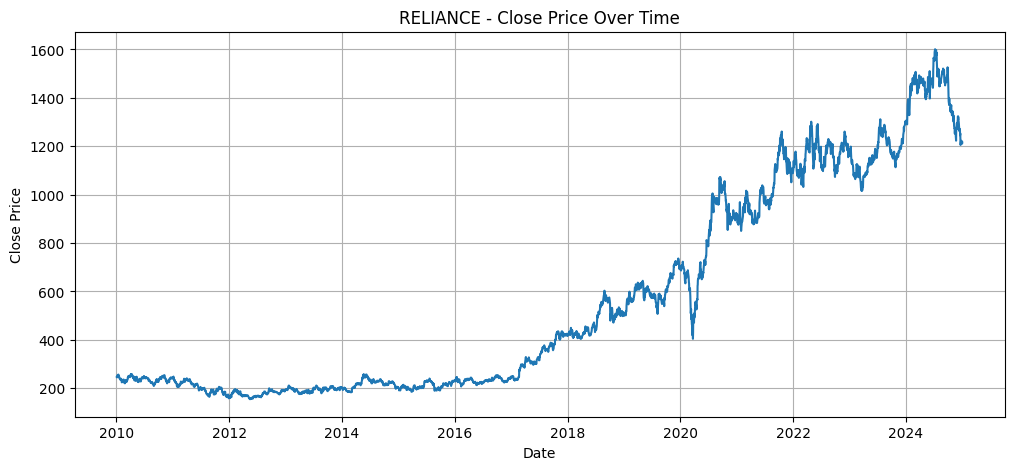

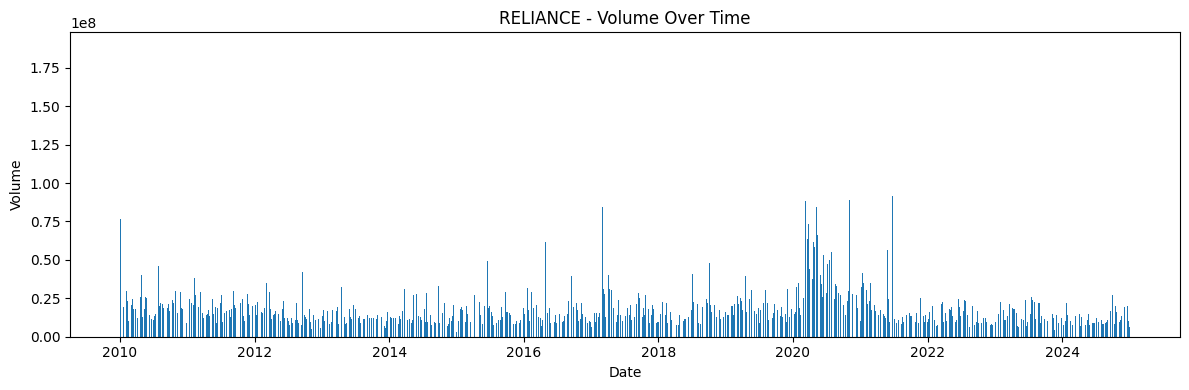

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# === Load final cleaned dataset ===
cleaned_path = "/content/drive/MyDrive/NSE_Stock_Data/top250_cleaned_final.csv"
df = pd.read_csv(cleaned_path)

# Ensure Date is datetime
df["Date"] = pd.to_datetime(df["Date"], errors="coerce")

# === Choose a stock to inspect ===
# Use symbol exactly as in your CSVs / Symbol column (e.g. "RELIANCE", "SBIN", "VOLTAS", "SUZLON")
stock_to_check = "RELIANCE"

# Filter data for that stock
stock_df = df[df["Stock"] == stock_to_check].copy()

print(f"Rows for {stock_to_check}:", stock_df.shape[0])

# If no data, warn and stop
if stock_df.empty:
    print(f"No data found for {stock_to_check}. Check symbol name in 'Stock' column.")
else:
    # Sort by Date just to be safe
    stock_df = stock_df.sort_values("Date")

    # Quick sanity checks
    print("\nMissing values for this stock:\n", stock_df.isnull().sum())
    print("\nDate range:", stock_df["Date"].min(), "to", stock_df["Date"].max())
    print("\nPreview:\n", stock_df.head())

    # === Plot Close price over time ===
    plt.figure(figsize=(12, 5))
    plt.plot(stock_df["Date"], stock_df["Close"])
    plt.title(f"{stock_to_check} - Close Price Over Time")
    plt.xlabel("Date")
    plt.ylabel("Close Price")
    plt.grid(True)
    plt.show()

    # === Optional: plot Volume as well ===
    plt.figure(figsize=(12, 4))
    plt.bar(stock_df["Date"], stock_df["Volume"])
    plt.title(f"{stock_to_check} - Volume Over Time")
    plt.xlabel("Date")
    plt.ylabel("Volume")
    plt.tight_layout()
    plt.show()
